In [1]:
import os
import pandas as pd
import numpy as np

# Specify the directories for the main data and labels
main_data_dir = 'onlineset/rosbag/data/data_clean'
label_data_dir = 'onlineset/rosbag/data/label'

# Initialize an empty DataFrame to hold the combined data
combined_df = pd.DataFrame()

counter = 0

def extract_global_features(df, counter):
    features = {}
    # List of IMU sensor axes for which we are calculating features
    axes = ['Imu0_linear_accleration_x', 'Imu0_linear_accleration_y', 'Imu0_linear_accleration_z',
            'Imu0_angular_velocity_x', 'Imu0_angular_velocity_y', 'Imu0_angular_velocity_z',
            'Imu1_linear_accleration_x', 'Imu1_linear_accleration_y', 'Imu1_linear_accleration_z',
            'Imu1_angular_velocity_x', 'Imu1_angular_velocity_y', 'Imu1_angular_velocity_z',
            'Imu2_linear_accleration_x', 'Imu2_linear_accleration_y', 'Imu2_linear_accleration_z',
            'Imu2_angular_velocity_x', 'Imu2_angular_velocity_y', 'Imu2_angular_velocity_z']
    
    # Iterate through each axis and calculate features
    for axis in axes:
        features[f'{axis}_mean'] = df[axis].mean()
        features[f'{axis}_max'] = df[axis].max()
        features[f'{axis}_min'] = df[axis].min()
        features[f'{axis}_std'] = df[axis].std()
        features[f'{axis}_var'] = df[axis].var()
        features[f'{axis}_rms'] = np.sqrt(np.mean(df[axis]**2))
        features[f'{axis}_skew'] = df[axis].skew()
        features[f'{axis}_kurtosis'] = df[axis].kurtosis()

    # Add a csvfile identifier and label
    features['csvfile'] = counter
    
    return features

# Loop through each file in the main data directory
for filename in os.listdir(main_data_dir):
    if filename.endswith('.csv'):
        # Construct the file paths
        main_file_path = os.path.join(main_data_dir, filename)
        label_file_path = os.path.join(label_data_dir, filename.replace('_data.csv', '_label.csv'))
        
        # Read the main data and label files into DataFrames
        main_df = pd.read_csv(main_file_path)
        label_df = pd.read_csv(label_file_path, header=None)
        
        # Extract global features and store in a dictionary
        global_features = extract_global_features(main_df, counter)
        
        # Get the label value from the label file
        label_value = label_df.iloc[1, 0]
        global_features['label'] = label_value
        
        # Convert the global features to a DataFrame (1 row)
        global_features_df = pd.DataFrame([global_features])
        
        # Append the global features DataFrame to the combined DataFrame
        combined_df = pd.concat([combined_df, global_features_df], ignore_index=True)
        
        # Increment the counter
        counter += 1

# Display the first few rows of the combined DataFrame
combined_df.head()


,Imu0_linear_accleration_x_mean,Imu0_linear_accleration_x_max,Imu0_linear_accleration_x_min,Imu0_linear_accleration_x_std,Imu0_linear_accleration_x_var,Imu0_linear_accleration_x_rms,Imu0_linear_accleration_x_skew,Imu0_linear_accleration_x_kurtosis,Imu0_linear_accleration_y_mean,Imu0_linear_accleration_y_max,...,Imu2_angular_velocity_z_mean,Imu2_angular_velocity_z_max,Imu2_angular_velocity_z_min,Imu2_angular_velocity_z_std,Imu2_angular_velocity_z_var,Imu2_angular_velocity_z_rms,Imu2_angular_velocity_z_skew,Imu2_angular_velocity_z_kurtosis,csvfile,label
0,2.4286,2.56,2.33,0.062942,0.003962,2.429407,0.195250,-1.102560,1.6826,2.13,...,0.0020,0.05,-0.11,0.027377,0.000749,0.027313,-1.549173,3.665348,0,0
1,1.3287,1.42,1.20,0.049086,0.002409,1.329597,-0.454452,-0.386853,2.7883,2.92,...,0.0072,0.12,-0.09,0.027673,0.000766,0.028460,0.638604,5.975239,1,0
2,1.1171,1.25,1.06,0.041103,0.001689,1.117848,1.168490,1.223320,2.9364,3.01,...,0.0144,0.31,-0.11,0.045423,0.002063,0.047434,3.068063,19.973325,2,0
3,1.0187,1.10,0.96,0.026040,0.000678,1.019029,0.292463,0.156252,3.0190,3.07,...,0.0120,0.08,-0.01,0.012060,0.000145,0.016971,1.826118,9.307672,3,0
4,1.0261,1.08,0.97,0.022197,0.000493,1.026338,0.043018,-0.331592,2.9969,3.04,...,0.0135,0.06,-0.09,0.017660,0.000312,0.022159,-1.683334,11.811851,4,0


In [2]:
print(combined_df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Columns: 146 entries, Imu0_linear_accleration_x_mean to label
dtypes: float64(144), int64(1), object(1)
memory usage: 924.0+ KB
None 



In [3]:
print(combined_df['csvfile'].value_counts())

csvfile
0      1
543    1
533    1
534    1
535    1
      ..
273    1
274    1
275    1
276    1
809    1
Name: count, Length: 810, dtype: int64


In [4]:
print(combined_df['label'].value_counts())

label
10    109
2     103
0     102
6     101
4     100
3      99
1      98
5      98
Name: count, dtype: int64


In [5]:
combined_df['label'] = combined_df['label'].astype(float)
combined_df['label'] = combined_df['label'].replace(10, 7)
print(combined_df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Columns: 146 entries, Imu0_linear_accleration_x_mean to label
dtypes: float64(145), int64(1)
memory usage: 924.0 KB
None 



In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=144, h1=32, h2=16, out_features=8):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
model = Model()
X = combined_df.drop('label', axis=1)
y = combined_df['label']

In [9]:
X = X.values
y = y.values

In [10]:

from sklearn.model_selection import train_test_split

unique_groups = combined_df['csvfile'].unique()
print(unique_groups)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [11]:
# Train Test Split
train_groups, temp_groups = train_test_split(unique_groups, test_size=0.5, random_state=42)
test_groups, val_groups = train_test_split(temp_groups, test_size=0.5, random_state=42)

# Filter the DataFrame based on the group assignments
train_df = combined_df[combined_df['csvfile'].isin(train_groups)]
test_df = combined_df[combined_df['csvfile'].isin(test_groups)]
val_df = combined_df[combined_df['csvfile'].isin(val_groups)]

train_df = train_df.drop('csvfile', axis=1)
test_df = test_df.drop('csvfile', axis=1)
val_df = val_df.drop('csvfile', axis=1)

X_train = train_df.drop('label', axis=1)
y_train = train_df['label']
X_validation = val_df.drop('label', axis=1)
y_validation = val_df['label']
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

print(f"X_train shape: {X_train.shape}")
print(f"X_validation shape: {X_validation.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_validation shape: {y_validation.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (405, 144)
X_validation shape: (203, 144)
X_test shape: (202, 144)
y_train shape: (405,)
y_validation shape: (203,)
y_test shape: (202,)


In [12]:
print(X_train.dtypes)

Imu0_linear_accleration_x_mean      float64
Imu0_linear_accleration_x_max       float64
Imu0_linear_accleration_x_min       float64
Imu0_linear_accleration_x_std       float64
Imu0_linear_accleration_x_var       float64
                                     ...   
Imu2_angular_velocity_z_std         float64
Imu2_angular_velocity_z_var         float64
Imu2_angular_velocity_z_rms         float64
Imu2_angular_velocity_z_skew        float64
Imu2_angular_velocity_z_kurtosis    float64
Length: 144, dtype: object


In [13]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
X_validation = torch.FloatTensor(X_validation.values)

# Convert y labels to tensors long
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)
y_validation = torch.LongTensor(y_validation.values)

In [14]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
# Set the number of epochs
epochs = 100
train_losses = []
validation_losses = []
train_accuracies = []
validation_accuracies = []

for i in range(epochs):
    # Training phase
    model.train()  # Set the model to training mode
    y_pred = model.forward(X_train)  # Forward pass with training data

    # Calculate training loss
    loss = criterion(y_pred, y_train)
    train_losses.append(loss.detach())  # Track the training loss

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    with torch.no_grad():
        _, predicted_train = torch.max(y_pred, 1)  # Get the predicted class
        correct_train = (predicted_train == y_train).sum().item()  # Count correct predictions
        train_accuracy = correct_train / y_train.size(0) * 100  # Training accuracy in %
        train_accuracies.append(train_accuracy)  # Track training accuracy

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No need to track gradients during validation
        y_val_pred = model.forward(X_validation)  # Forward pass with validation data
        val_loss = criterion(y_val_pred, y_validation)  # Calculate validation loss
        validation_losses.append(val_loss.detach())  # Track the validation loss

        # Calculate validation accuracy
        _, predicted_val = torch.max(y_val_pred, 1)  # Get the predicted class
        correct_val = (predicted_val == y_validation).sum().item()  # Count correct predictions
        val_accuracy = correct_val / y_validation.size(0) * 100  # Validation accuracy in %
        validation_accuracies.append(val_accuracy)  # Track validation accuracy

    # Print losses and accuracies every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i} | Training Loss: {loss:.4f} | Validation Loss: {val_loss:.4f} '
              f'| Training Accuracy: {train_accuracy:.2f}% | Validation Accuracy: {val_accuracy:.2f}%')


Epoch: 0 | Training Loss: 2.1915 | Validation Loss: 1.8886 | Training Accuracy: 10.37% | Validation Accuracy: 35.96%
Epoch: 10 | Training Loss: 0.2479 | Validation Loss: 0.2170 | Training Accuracy: 94.07% | Validation Accuracy: 94.09%
Epoch: 20 | Training Loss: 0.0243 | Validation Loss: 0.0327 | Training Accuracy: 99.51% | Validation Accuracy: 98.03%
Epoch: 30 | Training Loss: 0.0032 | Validation Loss: 0.0309 | Training Accuracy: 100.00% | Validation Accuracy: 98.52%
Epoch: 40 | Training Loss: 0.0009 | Validation Loss: 0.0369 | Training Accuracy: 100.00% | Validation Accuracy: 98.52%
Epoch: 50 | Training Loss: 0.0005 | Validation Loss: 0.0356 | Training Accuracy: 100.00% | Validation Accuracy: 99.01%
Epoch: 60 | Training Loss: 0.0004 | Validation Loss: 0.0374 | Training Accuracy: 100.00% | Validation Accuracy: 99.01%
Epoch: 70 | Training Loss: 0.0003 | Validation Loss: 0.0369 | Training Accuracy: 100.00% | Validation Accuracy: 98.52%
Epoch: 80 | Training Loss: 0.0002 | Validation Loss:

In [16]:
# Test phase
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    y_test_pred = model.forward(X_test)  # Forward pass with test data
    test_loss = criterion(y_test_pred, y_test)  # Calculate test loss
    print(f'Test Loss: {test_loss:.4f}')
    
    # Calculate test accuracy
    _, predicted = torch.max(y_test_pred, 1)
    correct = (predicted == y_test).sum().item()
    test_accuracy = correct / y_test.size(0) * 100
    print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 0.0529
Test Accuracy: 98.51%


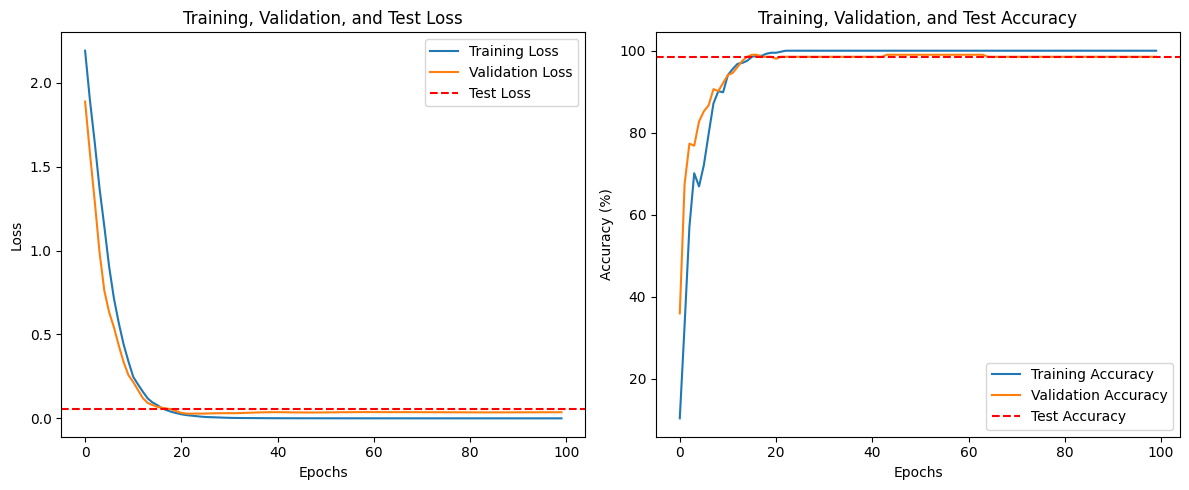

In [17]:
import matplotlib.pyplot as plt

# Plot Loss Curves
plt.figure(figsize=(12, 5))

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')  # Plot test loss as a horizontal line
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')  # Plot test accuracy as a horizontal line
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
# Set the number of epochs
epochs = 100
losses = []
validation_losses = []

for i in range(epochs):
    # Training phase
    model.train()  # Set the model to training mode
    y_pred = model.forward(X_train)  # Forward pass with training data

    # Calculate training loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach())  # Track the training loss

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No need to track gradients during validation
        y_val_pred = model.forward(X_validation)  # Forward pass with validation data
        val_loss = criterion(y_val_pred, y_validation)  # Calculate validation loss
        validation_losses.append(val_loss.detach())  # Track the validation loss

    # Print losses every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i} | Training Loss: {loss} | Validation Loss: {val_loss}')

Epoch: 0 | Training Loss: 2.346569299697876 | Validation Loss: 1.8440840244293213
Epoch: 10 | Training Loss: 0.2932649850845337 | Validation Loss: 0.22835007309913635
Epoch: 20 | Training Loss: 0.039780691266059875 | Validation Loss: 0.044961851090192795
Epoch: 30 | Training Loss: 0.006979104597121477 | Validation Loss: 0.024910686537623405
Epoch: 40 | Training Loss: 0.0018380131805315614 | Validation Loss: 0.02166282758116722
Epoch: 50 | Training Loss: 0.0008277538581751287 | Validation Loss: 0.02109544537961483
Epoch: 60 | Training Loss: 0.0005311674322001636 | Validation Loss: 0.019415946677327156
Epoch: 70 | Training Loss: 0.00039792133611626923 | Validation Loss: 0.01801985688507557
Epoch: 80 | Training Loss: 0.000334482901962474 | Validation Loss: 0.01872848905622959
Epoch: 90 | Training Loss: 0.00029431196162477136 | Validation Loss: 0.018254294991493225


In [32]:
import time
model.eval()  # Set the model to evaluation mode
start_time = time.time()
with torch.no_grad():
    y_test_pred = model.forward(X_test)  # Forward pass with test data
    
    test_loss = criterion(y_test_pred, y_test)  # Calculate test loss
    print(f'Test Loss: {test_loss}')
    
    # Optionally, calculate accuracy or other metrics
    _, predicted = torch.max(y_test_pred, 1)
    correct = (predicted == y_test).sum().item()
    accuracy = correct / y_test.size(0)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f'Test Accuracy: {accuracy * 100:.2f}%')
    print(f'Time taken for test predictions: {elapsed_time:.6f} seconds')

Test Loss: 0.08901279419660568
Test Accuracy: 97.03%
Time taken for test predictions: 0.061043 seconds


In [33]:
numpy_data = X_test.numpy() 
df = pd.DataFrame(numpy_data)
df.to_csv('xtest.csv', index=False, header=False)

print("CSV file saved successfully.")

CSV file saved successfully.


In [34]:
numpy_data = y_test.numpy() 
df = pd.DataFrame(numpy_data)
df.to_csv('ytest.csv', index=False, header=False)

print("CSV file saved successfully.")

CSV file saved successfully.


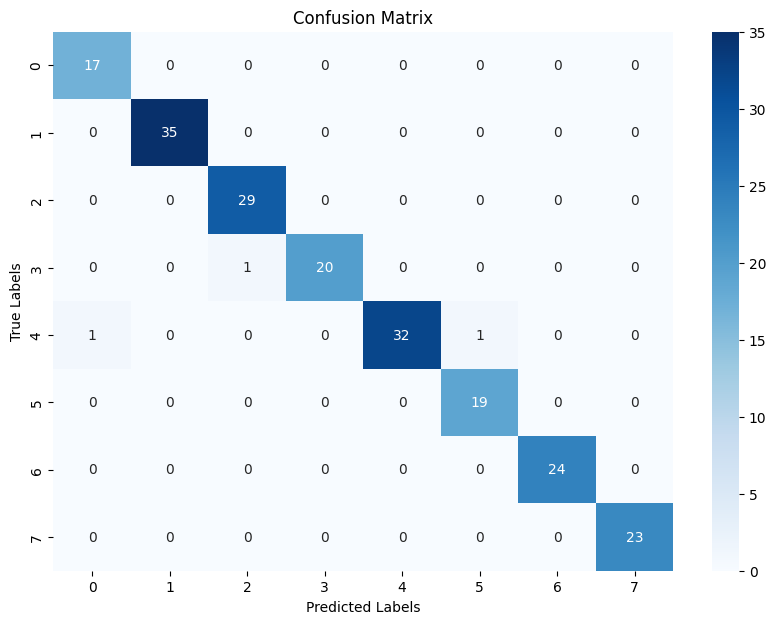

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_test_np = y_test.cpu().numpy()  # Convert to NumPy array if using GPU tensors
predicted_np = predicted.cpu().numpy()

cm = confusion_matrix(y_test_np, predicted_np)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [37]:
featurenames = combined_df.columns
featurenames

Index(['Imu0_linear_accleration_x_mean', 'Imu0_linear_accleration_x_max',
       'Imu0_linear_accleration_x_min', 'Imu0_linear_accleration_x_std',
       'Imu0_linear_accleration_x_var', 'Imu0_linear_accleration_x_rms',
       'Imu0_linear_accleration_x_skew', 'Imu0_linear_accleration_x_kurtosis',
       'Imu0_linear_accleration_y_mean', 'Imu0_linear_accleration_y_max',
       ...
       'Imu2_angular_velocity_z_mean', 'Imu2_angular_velocity_z_max',
       'Imu2_angular_velocity_z_min', 'Imu2_angular_velocity_z_std',
       'Imu2_angular_velocity_z_var', 'Imu2_angular_velocity_z_rms',
       'Imu2_angular_velocity_z_skew', 'Imu2_angular_velocity_z_kurtosis',
       'csvfile', 'label'],
      dtype='object', length=146)

In [38]:
from torch import nn

for layer in model.children():
    if isinstance(layer, nn.Linear):
        print("Weight: " )
        print(layer.state_dict()['weight'])
        print("Bias: " )
        print(layer.state_dict()['bias'])

Weight: 
tensor([[ 0.1359, -0.0126,  0.0240,  ..., -0.1202, -0.1683, -0.0724],
        [ 0.0556,  0.0226, -0.0320,  ..., -0.1726, -0.2779,  0.1717],
        [-0.2196, -0.1224, -0.0905,  ..., -0.0308, -0.1757,  0.0757],
        ...,
        [ 0.0856,  0.0048,  0.0995,  ..., -0.1151,  0.0529, -0.0949],
        [-0.2022, -0.1643, -0.0784,  ...,  0.1137,  0.1384,  0.0580],
        [ 0.1831,  0.2181,  0.2228,  ...,  0.2054, -0.1069, -0.0987]])
Bias: 
tensor([ 0.1089,  0.0439,  0.0868, -0.0640,  0.1075, -0.0326, -0.0747, -0.0013,
        -0.0641,  0.1200,  0.1187, -0.1140,  0.0054,  0.0098,  0.0870,  0.0380,
         0.0295, -0.0887, -0.0214,  0.1422,  0.0815,  0.0810,  0.1688,  0.0369,
         0.1093, -0.0358,  0.2263,  0.1408, -0.0127, -0.0407,  0.0144,  0.2161])
Weight: 
tensor([[-0.1172, -0.2039,  0.1095, -0.0010, -0.1406, -0.1097,  0.0586, -0.0825,
          0.1941,  0.3144, -0.4540,  0.2392, -0.1272,  0.1513,  0.2293, -0.1477,
          0.0164, -0.0825,  0.3170,  0.1297, -0.0252,  0.0

In [40]:
import torch
from torch import nn
import pandas as pd

# Assuming 'model' is your MLP model
for i, layer in enumerate(model.children()):
    if isinstance(layer, nn.Linear):
        # Get weights and biases
        weights = layer.state_dict()['weight'].cpu().numpy()
        biases = layer.state_dict()['bias'].cpu().numpy()
        
        # Convert weights and biases to DataFrames
        weights_df = pd.DataFrame(weights)
        biases_df = pd.DataFrame(biases)
        
        # Define file names for CSV files
        weight_filename = f'layer_{i}_weights.csv'
        bias_filename = f'layer_{i}_biases.csv'
        
        # Save weights and biases to CSV files
        weights_df.to_csv(weight_filename, index=False, header=False)
        biases_df.to_csv(bias_filename, index=False, header=False)
        
        print(f'Saved weights to {weight_filename}')
        print(f'Saved biases to {bias_filename}')


Saved weights to layer_0_weights.csv
Saved biases to layer_0_biases.csv
Saved weights to layer_1_weights.csv
Saved biases to layer_1_biases.csv
Saved weights to layer_2_weights.csv
Saved biases to layer_2_biases.csv


In [41]:
X_validation

tensor([[ 2.4286e+00,  2.5600e+00,  2.3300e+00,  ...,  2.7313e-02,
         -1.5492e+00,  3.6653e+00],
        [ 1.1171e+00,  1.2500e+00,  1.0600e+00,  ...,  4.7434e-02,
          3.0681e+00,  1.9973e+01],
        [ 1.6848e+00,  1.7400e+00,  1.6400e+00,  ...,  1.4355e-02,
         -9.6454e-01,  1.3365e+00],
        ...,
        [-6.6853e+00, -5.4100e+00, -9.7000e+00,  ...,  7.6161e-01,
          3.4581e+00,  1.3764e+01],
        [-6.3948e+00, -4.7100e+00, -7.6500e+00,  ...,  4.6036e-01,
          3.3302e+00,  1.1383e+01],
        [-4.5613e+00, -3.1400e+00, -6.4100e+00,  ...,  4.8791e-01,
          3.8705e+00,  1.5617e+01]])

In [20]:
import torch

# Convert input data to a PyTorch tensor
input_data = torch.tensor([[1.0187,1.1,0.96,0.02604018,0.0006780909,1.0190295,0.29246312,0.15625152,3.019,3.07,2.96,0.021625835,0.00046767676,3.0190766,-0.1620381,0.24577479,9.06,9.14,8.98,0.033333335,0.0011111111,9.0600605,-0.0050092763,-0.37390548,0.0964,0.12,0.08,0.0071802195,5.1555555e-05,0.09666437,0.49530438,0.30859077,0.0308,0.05,0.02,0.00691653,4.7838384e-05,0.031559467,0.4542584,0.541849,0.0053,0.01,0.0,0.0050161355,2.5161617e-05,0.00728011,-0.12205509,-2.0260355,-8.3721,-8.24,-8.47,0.04063374,0.001651101,8.372197,0.04174422,0.28397015,4.5221,4.61,4.44,0.032823216,0.0010773636,4.5222178,-0.07632977,-0.16051912,2.6643,2.79,2.57,0.03649422,0.0013318283,2.6645474,0.38471994,0.8125317,0.0682,0.08,0.06,0.004114522,1.6929293e-05,0.06832276,-1.2379956,0.8811203,-0.135,-0.13,-0.14,0.005025189,2.5252526e-05,0.13509256,0.0,-2.041237,0.0128,0.03,0.0,0.0060436125,3.6525253e-05,0.014142135,0.34694535,0.2899276,-7.6992,-7.64,-7.76,0.023556508,0.0005549091,7.6992354,-0.2065083,0.119233504,5.4367,5.5,5.36,0.026402287,0.0006970808,5.4367633,-0.010191155,0.41262498,0.9005,1.0,0.82,0.03627546,0.0013159091,0.90122306,0.035319686,0.08802274,0.1481,0.16,0.14,0.005259911,2.7666667e-05,0.14819244,-0.19136243,0.115383916,0.1055,0.13,0.08,0.008918826,7.9545454e-05,0.105872564,0.15145783,0.46847537,0.012,0.08,-0.01,0.012060454,0.00014545454,0.016970562,1.8261179,9.307672]], dtype=torch.float32)

# Ensure the model is in evaluation mode
model.eval()

# Disable gradient calculations for inference
with torch.no_grad():
    # Perform a forward pass
    output = model(input_data)
    probabilities = F.softmax(output, dim=1)

# Print the output
print(output)
print("Probabilities:", probabilities)


tensor([[ 16.3946,  -2.8632, -19.7328, -22.1057,  -4.2480,  -7.3543, -16.0464,
          -2.4063]])
Probabilities: tensor([[1.0000e+00, 4.3298e-09, 2.0421e-16, 1.9034e-17, 1.0841e-09, 4.8528e-11,
         8.1478e-15, 6.8376e-09]])


In [22]:
X_test

tensor([[ 1.0187e+00,  1.1000e+00,  9.6000e-01,  ...,  1.6971e-02,
          1.8261e+00,  9.3077e+00],
        [ 1.5459e+00,  1.6100e+00,  1.5000e+00,  ...,  1.4177e-02,
          5.9822e-01,  2.8389e+00],
        [ 5.1708e+00,  5.2100e+00,  5.1000e+00,  ...,  1.4107e-02,
          2.2963e-01, -2.6297e-02],
        ...,
        [-8.2954e+00, -6.7700e+00, -9.2900e+00,  ...,  3.7893e-01,
          4.7015e+00,  2.6226e+01],
        [-7.7376e+00, -6.6400e+00, -9.1600e+00,  ...,  4.5223e-01,
          3.5480e+00,  1.4156e+01],
        [-6.3912e+00, -5.4700e+00, -8.0500e+00,  ...,  6.8530e-01,
          2.7531e+00,  7.6905e+00]])